In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import numpy as np
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error


from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [2]:
NVDA_stock_data=pd.read_csv("NVDA (1).csv", index_col='Date')
NVDA_stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-22,46.337502,47.275002,46.020000,47.117500,46.797504,27993600
2019-04-23,47.250000,47.982498,47.152500,47.667500,47.343765,34685600
2019-04-24,47.772499,48.202499,47.160000,47.792500,47.467915,31820400
2019-04-25,47.387501,47.612499,45.924999,46.727501,46.410149,49929600
2019-04-26,45.177502,45.222500,43.325001,44.522499,44.220123,86898800
...,...,...,...,...,...,...
2024-04-16,864.330017,881.179993,860.640015,874.150024,874.150024,37045300
2024-04-17,883.400024,887.750000,839.500000,840.349976,840.349976,49540000
2024-04-18,849.700012,861.900024,824.020020,846.710022,846.710022,44726000


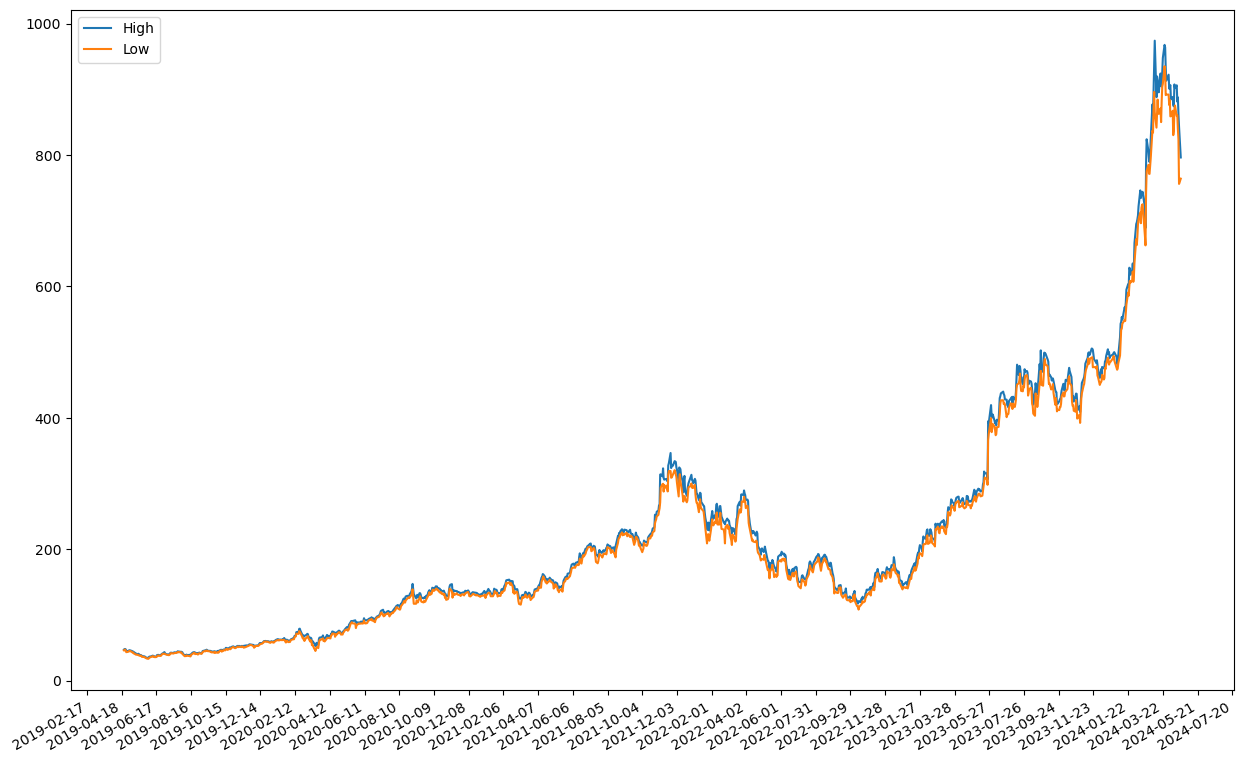

In [3]:
NVDA_dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in NVDA_stock_data.index.values]
plt.figure(figsize=(15,10))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))

plt.plot(NVDA_dates,NVDA_stock_data['High'], label="High")
plt.plot(NVDA_dates,NVDA_stock_data['Low'], label="Low")
plt.legend()
plt.gcf().autofmt_xdate()

Shall be using a five year period or this model.

In [4]:
NVDA_y_target = NVDA_stock_data['Close']
NVDA_X_feat = NVDA_stock_data.iloc[:, 0:3]

print(NVDA_X_feat)

NVDA_stock_data.iloc[:, 0:3]

                  Open        High         Low
Date                                          
2019-04-22   46.337502   47.275002   46.020000
2019-04-23   47.250000   47.982498   47.152500
2019-04-24   47.772499   48.202499   47.160000
2019-04-25   47.387501   47.612499   45.924999
2019-04-26   45.177502   45.222500   43.325001
...                ...         ...         ...
2024-04-16  864.330017  881.179993  860.640015
2024-04-17  883.400024  887.750000  839.500000
2024-04-18  849.700012  861.900024  824.020020
2024-04-19  831.500000  843.239990  756.059998
2024-04-22  781.109985  796.260010  764.000000

[1260 rows x 3 columns]


,Open,High,Low
Date,,,
2019-04-22,46.337502,47.275002,46.020000
2019-04-23,47.250000,47.982498,47.152500
2019-04-24,47.772499,48.202499,47.160000
2019-04-25,47.387501,47.612499,45.924999
2019-04-26,45.177502,45.222500,43.325001
...,...,...,...
2024-04-16,864.330017,881.179993,860.640015
2024-04-17,883.400024,887.750000,839.500000
2024-04-18,849.700012,861.900024,824.020020


In [5]:
NVDA_X_feat

,Open,High,Low
Date,,,
2019-04-22,46.337502,47.275002,46.020000
2019-04-23,47.250000,47.982498,47.152500
2019-04-24,47.772499,48.202499,47.160000
2019-04-25,47.387501,47.612499,45.924999
2019-04-26,45.177502,45.222500,43.325001
...,...,...,...
2024-04-16,864.330017,881.179993,860.640015
2024-04-17,883.400024,887.750000,839.500000
2024-04-18,849.700012,861.900024,824.020020


scaler= StandardScaler()
NVDA_X_ft = scaler.fit_transform(NVDA_X_feat.values)
NVDA_X_ft = pd.DataFrame(columns = NVDA_X_feat.columns, data=NVDA_X_ft, index=NVDA_X_feat.index)
print(type(NVDA_X_ft))
NVDA_X_ft.head()

Long Short Term Memory networks

type(train_dates)
print(train_dates)

In [6]:
scaler= StandardScaler()
# Fit and transform the feature data
NVDA_X_ft = scaler.fit_transform(NVDA_X_feat)
# Convert the transformed feature data back to a pandas DataFrame
NVDA_X_feat = pd.DataFrame(data=NVDA_X_ft, columns=NVDA_X_feat.columns, index=NVDA_X_feat.index)


In [7]:

# Fit and transform the target data
# Since `NVDA_y_target` is a pandas Series, reshape it to a 2D array to fit and transform
NVDA_y_target_reshaped = NVDA_y_target.values.reshape(-1, 1)
NVDA_y_target_scaled = scaler.fit_transform(NVDA_y_target_reshaped)
# Convert the transformed target data back to a pandas Series
NVDA_y_target = pd.Series(NVDA_y_target_scaled.flatten(), index=NVDA_y_target.index)


In [8]:
# Split data into training and validation sets
train_size = int(0.8 * len(NVDA_stock_data))
train_X_feat = NVDA_X_feat[:train_size]
train_y_target = NVDA_y_target[:train_size]
val_X_feat = NVDA_X_feat[train_size:]
val_y_target = NVDA_y_target[train_size:]

In [9]:
# Define the length for time series (number of past time steps to look back)
length = 10  # This is an example value, adjust as needed for your data
# Initialize TimeseriesGenerator for training set
train_generator = TimeseriesGenerator(train_X_feat, train_y_target, length=length, batch_size=1)
# Initialize TimeseriesGenerator for validation set
val_generator = TimeseriesGenerator(val_X_feat, val_y_target, length=length, batch_size=1)


In [10]:
model = Sequential([
    LSTM(64, input_shape=(length, train_X_feat.shape[1]), return_sequences=True),
    LSTM(32, return_sequences=False),  
    Dense(1)  
])

In [ ]:
model.compile(optimizer='adam', loss='mse')
model.fit(train_generator, validation_data=val_generator, epochs=1)# epochs=20

809/998 [=======================>......] - ETA: 3s - loss: 0.0072

In [ ]:
pred_y_2D=model.predict(val_generator)
print(pred_y_2D)
pred_y_1D= pred_y.reshape(-1)
print(pred_y_1D)



In [ ]:
predictions_y = scaler.inverse_transform(pred_y_2D)

In [ ]:
plt.plot(NVDA_dates[train_size+10:], NVDA_stock_data['Close'][train_size+10:], label="")
plt.plot(NVDA_dates[train_size+10: ], predictions_y, label="")
plt.gcf().autofmt_xdate()

Although the model seems to under predict closing prices for the stock, the model seems to be following the trend better than I expected. It starts to break away around 2024-01.

This is a plot where features are given, and incurcumstance where we want to predict a couple of days in the future.....

Although the prediction fit the model well, the model cant be use to predict past a day.

NOTE: add plot for data

Lets try a series of models using shorter periods of time.

In [ ]:
model2 = Sequential([
    LSTM(64, input_shape=(length, train_X_feat.shape[1]), return_sequences=True),
    LSTM(32, return_sequences=False),  
    Dense(1)  
])
train_X_feat.shape[1]

In [ ]:
# Split data into training and validation sets
train_size2 = int(0.5 * len(NVDA_stock_data))
train_X_feat2 = NVDA_X_feat[:train_size2]
train_y_target2 = NVDA_y_target[:train_size2]
val_X_feat2 = NVDA_X_feat[train_size2:]
val_y_target2 = NVDA_y_target[train_size2:]

train_generator2 = TimeseriesGenerator(train_X_feat[], train_y_target[], length=length, batch_size=1)
val_generator2 = TimeseriesGenerator(val_X_feat[], val_y_target[], length=length, batch_size=1)


In [ ]:
train_generator2 = TimeseriesGenerator(train_X_feat2, train_y_target2, length=length, batch_size=1)
val_generator2 = TimeseriesGenerator(val_X_feat2, val_y_target2, length=length, batch_size=1)

In [ ]:
model2.compile(optimizer='adam', loss='mse')
model2.fit(train_generator2, validation_data=val_generator2, epochs=10)

In [ ]:
pred_y2 = model2.predict(val_generator2)
pred_y2 = pred_y2.reshape(-1)


In [ ]:
plt.plot(NVDA_dates[train_size2+10:], val_y_target2[10:], label="")
plt.plot(NVDA_dates[train_size2+10: ], pred_y2, label="")
plt.gcf().autofmt_xdate()

In [ ]:
model3 = Sequential([
    LSTM(64, input_shape=(length, train_X_feat.shape[1]), return_sequences=True),
    LSTM(32, return_sequences=False),  
    Dense(1)  
])

In [ ]:
# Split data into training and validation sets
train_size3 = int(0.3 * len(NVDA_stock_data))
train_X_feat3 = NVDA_X_feat[:train_size3]
train_y_target3 = NVDA_y_target[:train_size3]
val_X_feat3 = NVDA_X_feat[train_size3:]
val_y_target3 = NVDA_y_target[train_size3:]

In [ ]:
train_generator3 = TimeseriesGenerator(train_X_feat3, train_y_target3, length=length, batch_size=1)
val_generator3 = TimeseriesGenerator(val_X_feat3, val_y_target3, length=length, batch_size=1)

In [ ]:
model3.compile(optimizer='adam', loss='mse')
model3.fit(train_generator3, validation_data=val_generator3, epochs=10)

In [ ]:
pred_y3 = model3.predict(val_generator3)
pred_y3 = pred_y3.reshape(-1)


In [ ]:
plt.plot(NVDA_dates[train_size3+10:], val_y_target3[10:], label="")
plt.plot(NVDA_dates[train_size3+10: ], pred_y3, label="")
plt.gcf().autofmt_xdate()

In [ ]:
model4 = Sequential([
    LSTM(64, input_shape=(length, train_X_feat.shape[1]), return_sequences=True),
    LSTM(32, return_sequences=False),  
    Dense(1)  
])

In [ ]:
# Split data into training and validation sets
train_size4 = int(0.2 * len(NVDA_stock_data))
train_X_feat4 = NVDA_X_feat[:train_size4]
train_y_target4 = NVDA_y_target[:train_size4]
val_X_feat4 = NVDA_X_feat[train_size4:]
val_y_target4 = NVDA_y_target[train_size4:]

In [ ]:
train_generator4 = TimeseriesGenerator(train_X_feat4, train_y_target4, length=length, batch_size=1)
val_generator4 = TimeseriesGenerator(val_X_feat4, val_y_target4, length=length, batch_size=1)

In [ ]:
model4.compile(optimizer='adam', loss='mse')
model4.fit(train_generator4, validation_data=val_generator4, epochs=10)

In [ ]:
pred_y4 = model4.predict(val_generator4)
pred_y4 = pred_y4.reshape(-1)


In [ ]:
plt.plot(NVDA_dates[train_size4+10:], val_y_target4[10:], label="")
plt.plot(NVDA_dates[train_size4+10: ], pred_y4, label="")
plt.gcf().autofmt_xdate()

In [ ]:
model5= Sequential([
    LSTM(64, input_shape=(10, train_X_feat.shape[1]), return_sequences=True),
    LSTM(32, return_sequences=False),  
    Dense(1)  
])

In [ ]:
# Split data into training and validation sets
train_size5 = int(0.95 * len(NVDA_stock_data))
train_X_feat5 = NVDA_X_feat[train_size5-200:train_size5]
train_y_target5 = NVDA_y_target[train_size5-200:train_size5]
val_X_feat5 = NVDA_X_feat[train_size5:]
val_y_target5 = NVDA_y_target[train_size5:]

In [ ]:
train_generator5 = TimeseriesGenerator(train_X_feat5, train_y_target5, length=length, batch_size=1)
val_generator5 = TimeseriesGenerator(val_X_feat5, val_y_target5, length=length, batch_size=1)

In [ ]:
model5.compile(optimizer='adam', loss='mse')
model5.fit(train_generator5, validation_data=val_generator5, epochs=20)

In [ ]:
pred_y5_1 = model5.predict(val_generator5)
pred_y5 = pred_y5_1.reshape(-1)


In [ ]:
plt.plot(NVDA_dates[train_size5+10:], val_y_target5[10:], label="Actual")
plt.plot(NVDA_dates[train_size5+10: ], pred_y5, label="Predicted")
plt.gcf().autofmt_xdate()
plt.legend()

In [ ]:
#pred_y5_2D=model.predict(val_generator5)
predictions_y5 = scaler.inverse_transform(pred_y5_1)

In [ ]:
plt.plot(NVDA_dates[train_size5+10:], NVDA_stock_data['Close'][train_size5+10:], label="Actual")
plt.plot(NVDA_dates[train_size5+10: ], predictions_y5, label="Predicted")
plt.gcf().autofmt_xdate()
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate mean squared error
mse = mean_squared_error(val_y_target5[10:], pred_y5)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared
r2 = r2_score(val_y_target5[10:], pred_y5)
print(f'R-squared: {r2}')

In [ ]:
# Calculate mean squared error
mse = mean_squared_error( NVDA_stock_data['Close'][train_size5+10:], predictions_y5)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared
r2 = r2_score( NVDA_stock_data['Close'][train_size5+10:], predictions_y5)
print(f'R-squared: {r2}')

In [ ]:
# Split data into training and validation sets
train_size4 = int(0.2 * len(NVDA_stock_data))
train_X_feat4 = NVDA_X_feat[:train_size4]
train_y_target4 = NVDA_y_target[:train_size4]
val_X_feat4 = NVDA_X_feat[train_size4:]
val_y_target4 = NVDA_y_target[train_size4:]

In [ ]:
# Split data into training and validation sets
train_size5 = int(0.2 * len(NVDA_stock_data))
train_X_feat5 = NVDA_X_feat[:train_size5]
train_y_target5 = NVDA_y_target[:train_size5]
val_X_feat5 = NVDA_X_feat[train_size5:]
val_y_target5 = NVDA_y_target[train_size5:]

In [ ]:
train_generator4 = TimeseriesGenerator(train_X_feat4, train_y_target4, length=length, batch_size=1)
val_generator4 = TimeseriesGenerator(val_X_feat4, val_y_target4, length=length, batch_size=1)

In [ ]:
train_generator5 = TimeseriesGenerator(X_train, y_train, length=length, batch_size=1)
val_generator5 = TimeseriesGenerator(X_test, y_test, length=length, batch_size=1)

In [ ]:
model5.compile(optimizer='adam', loss='mse')
model5.fit(train_generator5, validation_data=val_generator5, epochs=10)

In [ ]:
pred_y5 = model5.predict(val_generator4)
pred_y5 = pred_y5.reshape(-1)


In [ ]:
plt.plot(NVDA_dates[train_size4+10:], y_scaled[10:], label="")
plt.plot(NVDA_dates[train_size4+10: ], pred_y4, label="")
plt.gcf().autofmt_xdate()

In [ ]:
plt.plot(NVDA_dates[train_size4+10:], val_y_target4[10:], label="")
plt.plot(NVDA_dates[train_size4+10: ], pred_y4, label="")
plt.gcf().autofmt_xdate()

In [ ]:
NVDA_y_target = NVDA_stock_data.iloc[:, 0:4]
NVDA_X_feat = NVDA_stock_data.iloc[:, 0:4]
print(NVDA_X_feat)

In [ ]:
model5 = Sequential([
    LSTM(64, input_shape=(length, train_X_feat.shape[1]), return_sequences=True),
    LSTM(32, return_sequences=False),  
    Dense(1)  
])

In [ ]:
# Split data into training and validation sets
train_size5 = int(0.3* len(NVDA_stock_data))
train_X_feat5 = NVDA_X_feat[:train_size5]
train_y_target5 = NVDA_y_target[:train_size5]
val_X_feat5 = NVDA_X_feat[train_size5:]
val_y_target5 = NVDA_y_target[train_size5:]

In [ ]:
train_generator5 = TimeseriesGenerator(train_X_feat5, train_y_target5, length=length, batch_size=1)
val_generator5 = TimeseriesGenerator(val_X_feat5, val_y_target5, length=length, batch_size=1)

In [ ]:
model4.compile(optimizer='adam', loss='mse')
model4.fit(train_generator4, validation_data=val_generator4, epochs=10)

In [ ]:
NVDA_y_target = NVDA_stock_data.iloc[:, 0:4]
NVDA_X_feat = NVDA_stock_data.iloc[:, 0:3]


In [ ]:
model5 = Sequential([
    LSTM(64, input_shape=(length, train_X_feat.shape[1]), return_sequences=True),
    LSTM(32, return_sequences=True),  
    Dense(4)  
])

In [ ]:
# Split data into training and validation sets
train_size5 = int(0.2 * len(NVDA_stock_data))
train_X_feat5 = NVDA_X_feat[:train_size5]
train_y_target5 = NVDA_y_target[:train_size5]
val_X_feat5 = NVDA_X_feat[train_size5:]
val_y_target5 = NVDA_y_target[train_size5:]

In [ ]:
train_generator5 = TimeseriesGenerator(train_X_feat5, train_y_target5, length=length, batch_size=1)
val_generator5 = TimeseriesGenerator(val_X_feat5, val_y_target5, length=length, batch_size=1)

In [ ]:
model5.compile(optimizer='adam', loss='mse')
model5.fit(train_generator5, validation_data=val_generator5, epochs=20)

In [ ]:
# Define the length and batch size for the TimeseriesGenerator
length = 10
batch_size = 1

# Split the data into training and validation sets
train_size5 = int(0.2 * len(NVDA_stock_data))
train_X_feat5 = NVDA_stock_data.iloc[:train_size5, 0:3]
train_y_target5 = NVDA_stock_data.iloc[:train_size5, 0:4]
val_X_feat5 = NVDA_stock_data.iloc[train_size5:, 0:3]
val_y_target5 = NVDA_stock_data.iloc[train_size5:, 0:4]

# Create TimeseriesGenerator for training and validation data
train_generator5 = TimeseriesGenerator(train_X_feat5.values, train_y_target5.values, length=length, batch_size=batch_size)
val_generator5 = TimeseriesGenerator(val_X_feat5.values, val_y_target5.values, length=length, batch_size=batch_size)

# Define the sequential model
model5 = Sequential([
    LSTM(64, input_shape=(length, 3), return_sequences=True),
    LSTM(32, return_sequences=False),  # Set return_sequences=False for final prediction
    Dense(4)  # Output layer with 4 units to predict all 4 target values
])

# Compile the model
model5.compile(optimizer='adam', loss='mse')

# Train the model
model5.fit(train_generator5, validation_data=val_generator5, epochs=20)

In [ ]:
input_data = NVDA_stock_data.iloc[-10: , :3].values
print(input_data.shape)
print(input_data)
print(NVDA_stock_data.shape)
input_data = input_data.reshape((1, length, 3))
print(input_data.shape)
print(input_data)

In [ ]:
print(input_data[0,1,])

In [ ]:
def shift_left(array, pred):
    for i in range(4):
        array[0,i,]=pred[0,i+1]

In [ ]:
pred_target=model5.predict(input_data)



In [ ]:
predictions=NVDA_stock_data.iloc[-1:,:3].values
print(type(predictions))
print(predictions)
for i in range(5):
    pass
    

RNN model

In [ ]:
NVDA_X_feat.values[0:5, :-1]
NVDA_X_feat.values[4, -1]

In [ ]:
NVDA_X_feat.values[0:5, :]

In [ ]:
NVDA_X_feat.head()


In [ ]:
NVDA_stock_data.index

In [ ]:
NVDA_stock_data.index.values